# **Written Exam for the M.Sc. in Economics, Winter 2019-20**
**Advanced Macro economics: Structural Vector Autoregressive Analysis:** 

**About the exam**
The topic for this pro ject examination is the money demand function stating that the demand for money is a function of interest rates and output. The standard long-run money demand function can be written as
$$m =\beta_0+\beta_1y+\beta_2(r^S−r^O)\tag{1}$$
where $m$ is the natural logarithm of real money balance $(M/P)$, $y$ is the natural logarithm of real GDP, $r^S$ is the short-run interest rate and $r^O$ is the "own rate" of return of components in the money stock. The spread $(r^S−r^O)$ represents the opportunity cost of holding money balances.

There is a large literature estimating this money demand function and studies of the effects of monetary policy. One puzzle that emerges in this literature is that restrictive monetary policy (an increase in the money market rate) is associated with increased prices. There have been many attempts in the literature to understand and/or explain this result. The present assignment provides an additional approach to investigate this puzzle.

Approximate the spread using the money market rate, i.e., $r=(r^S−r^O)$. We can then rewrite the money demand function ab ove as the following long-run relationship 
$$m = \beta_0+\beta_1y+\beta_2r\tag{2}$$

This implies that if the variables in the equation ab ove are $I(1)$-pro cesses, then the three variables must cointegrate.

Regarding the data for the exam paper, please note the following:
- All assignments are based on different data sets. You should use the data set (monthly data covering the p erio d 1979:02-2003:12) located in the MATLAB file 1234.mat, where 1234 is your exam number. This MATLAB file contains the data ($y$), the dates (dates) and the name of the variables (names). You can load this file into MATLAB directly using 'load 1234.mat'. In case you cannot find your exam number, you can use the
`1000.mat` file.
- To avoid that some data sets are more difficult to handle than others, the data sets are artificial (simulated from a known data generating pro cess), and they b ehave, as close as possible, like actual data.
The prop osed solution below is based on the dataset `1000.mat`

The proposed solution below is based on the dataset `1000.mat`

<center>

### **Preamble**

</center>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
font_props = FontProperties(family='Times New Roman', size=10)
import seaborn as sns
sns.set_palette("pastel") 

from IPython.display import display, Math, clear_output
from sympy import Matrix
from sympy import latex, symbols

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.tsatools import vech

from scipy.optimize import least_squares
from scipy.optimize import fsolve
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import f

from pathlib import Path
import pandas as pd
import numpy as np
import random
import sys
import os

import warnings
warnings.filterwarnings("ignore", message="Setting `xtol` below the machine epsilon")
warnings.filterwarnings("ignore", message="Setting `gtol` below the machine epsilon")
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2


current_dir = Path.cwd()
sys.path.append(f"{current_dir}")

# Save output:
Python_path = None
LaTeX_path = None # LaTeX editor Texifier for macOS (https://www.texifier.com) highly recommended


pd.options.display.float_format = '{:.4f}'.format  # Ændrer til 4 decimale4

color_navy = '#{:02x}{:02x}{:02x}'.format(85, 108, 131)
colors_navy = ["#a5c6e2", "#80afd6", "#5b97ca", "#3b7fb9", "#2f6694", "#234c6f", "#17334a", "#0b1925"]
colors_pastel = sns.color_palette("pastel", 10)
colors_pastel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [ ]:
# Data:
result = pd.read_excel(f'{current_dir}/Data & Estimates/1000_2019.xlsx')

# Very important:
list_of_info = ["Dates: 1979-2003 (Monthly)","Real Money Balance","Real GDP", "Interest Rate Spread"]
list_of_info_latex = [r"$\ln(M_t/P_t)$", r"$\ln(Y_t)$",	r"$R$"]
K = len(result.drop(columns=["Dates"]).columns)

# Package/module:
from Structural_Vector_Autoregressive_Analysis import BaseClass

# Initialiser BaseClass med ønskede parametre
Base_initialize = BaseClass(LaTeX_path = None,                          # Can be None or LaTeX_path if LaTeX_path =! None it will save Tables/Plots to the LaTeX_path
                            Python_path = Python_path,                  # Path to Python folder
                            list_of_info_latex = list_of_info_latex,    # List of variable
                            list_of_info = list_of_info,                # List of names for each variable 
                            # Path to JCV.npy, PSSCV.npy and SigLevels.xlsx
                            path = f"{current_dir}/Data & Estimates/")    

from Structural_Vector_Autoregressive_Analysis import Initial_Tools as SVAR_IT
SVAR_IT = SVAR_IT(Base_initialize, date_column="Dates")

## $\text{Q1}$
The data is already in natural logarithms (real money balance and real GDP are in logs whereas the money market rate is in p ercent). Plot the data and perform graphical analysis in order to assess the degree of integration of all three variables

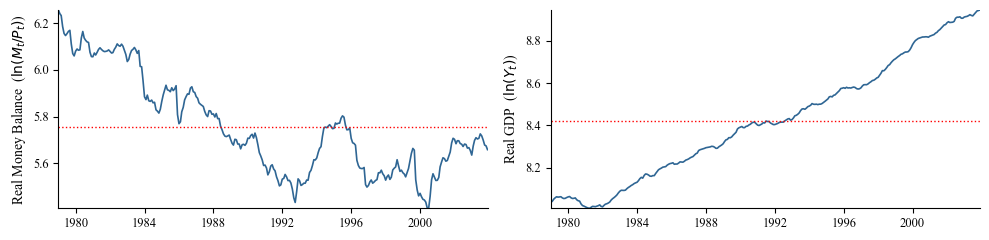

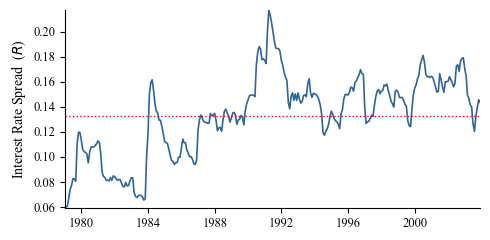

All variables have the same sample size: 300


,Mean,Median,Min,Max,Std. Dev.
Real Money Balance,5.7565,5.7068,5.4072,6.2560,0.2088
Real GDP,8.4227,8.4102,8.0077,8.9462,0.2799
Interest Rate Spread,0.1332,0.1367,0.0590,0.2175,0.0321


In [3]:
SVAR_IT.Data_plot(result,Save=False)
SVAR_IT.Descriptive_Statistics(result, display_data=True)
y_clean_data = SVAR_IT.clean_data(result,display_data=False)

### The Vector Error Correction Model
Suppose that the three variables in the money demand function are either $I(1)$ or $I(0)$ and that the underlying data generating process is a trivariate Vector Autoregressive (VAR) model, 
$$y_t=\nu+A_1y_{t−1}+\ldots+A_py_{t−p}+u_t\tag{3}$$
where $y_t=\begin{pmatrix}m&y&r\end{pmatrix}'$, $p$ is the lag length, $\nu$ is a constant term and $u_t$ is a trivariate zero mean white noise pro cess with covariance matrix $\Sigma_u$ such that $u_t\sim (0,\Sigma_u)$. Then we can rewrite the VAR model as the following Vector Error Correction (VEC) model
$$\Delta y_t=\nu+\Pi y_{t−1}+\Gamma_1\Delta y_{t−1}+\cdots+\Gamma_{p−1}\Delta y_{t−p+1}+u_t\tag{4}$$
where
$$
\Pi=−(I_3−A_1−\ldots−A_p)$$
and
$$Γ_i=−(A_{i+1}+\cdots+A_p)\quad\text{ for }~~i = 1,...,p −1$$

The rank of $\Pi$ is equal to the numb er of cointegration vectors $r$ and can be decomposed as a product of two $3\times r$ matrices of full rank, $\Pi=\alpha\beta'$ where α is the $3\times r$ adjustment coefficients
and $\beta$ is the $3\times r$ cointegration vectors

## $\text{Q2}$
Formulate a well-specified VEC model for $y_t$ similar to the VEC model above. Explain your workflow and how you argue for your choice of the number of autoregressive lags in the VEC model (and in its associate VAR model)


In [4]:
from Structural_Vector_Autoregressive_Analysis import Lag_Order_Determination as SVAR_LOD
SVAR_LOD = SVAR_LOD(Base_initialize, y_dataframe=y_clean_data)

from Structural_Vector_Autoregressive_Analysis import Diagnostic_Testing as SVAR_DT
SVAR_DT = SVAR_DT(Base_initialize, y_dataframe=y_clean_data)
 
from Structural_Vector_Autoregressive_Analysis import Univariate_Diagnostic_Testing as SVAR_UDT
SVAR_UDT = SVAR_UDT(Base_initialize, y_dataframe=y_clean_data)

from Structural_Vector_Autoregressive_Analysis import Testing_Cointegration as SVAR_TC
SVAR_TC = SVAR_TC(Base_initialize, y_dataframe=y_clean_data)

In [5]:
_ = SVAR_LOD.Information_Criteria(maximum_lag_length=36, Trend=False, Show=True)

Lag,SIC,HQ,AIC
0,-14.976227,-15.000534,-15.016863
1,-28.460632,-28.557860,-28.623175
2,-28.771172,-28.941322,-29.055623
3,-28.617940,-28.861011,-29.024298
4,-28.460763,-28.776756,-28.989029
5,-28.297988,-28.686902,-28.948161
6,-28.121970,-28.583804,-28.894050
7,-27.964469,-28.499225,-28.858456
8,-27.814604,-28.422281,-28.830499
9,-27.693482,-28.374080,-28.831283


In [6]:
_ = SVAR_LOD.Top_Down_Sequence(maximum_lag_length=4, Trend=False, Show=True)
# # Michael Bergman's computed log-likelihood differs from this one.
# # LR test and p-value is the same.

Lag,Log. Likelihood,LR test,p-value
0,-4382.673339,,
1,-8484.034093,4101.360755,0.000000
2,-8633.787546,149.753453,0.000000
3,-8644.665572,10.878026,0.284162
4,-8652.464107,7.798535,0.554570


In [7]:
SVAR_LOD.Combined_Lag_Selection(maximum_lag_length=12, Trend = False, LaTeX=False)

Lag,SIC,HQ,AIC,LR Test
0,-14.796,-14.818,-14.834,
1,-28.463,-28.554,-28.616,3987.195***
2,-28.804,-28.964,-29.071,149.24***
3,-28.662,-28.891,-29.044,10.098
4,-28.516,-28.813,-29.012,8.709
5,-28.360,-28.726,-28.970,6.062
6,-28.202,-28.637,-28.927,5.659
7,-28.050,-28.553,-28.889,6.962
8,-27.893,-28.465,-28.847,5.867
9,-27.769,-28.409,-28.837,15.257*


## $\text{Q3}$
Test for multivariate autocorrelation, heteroscedasticity and normality. Do es your model satisfy the underlying assumptions?

In [8]:
SVAR_DT.Eigenvalue_Short_Table(maximum_lag_length=3, LaTeX=False)

Lag,"No Constant, No Trend",Constant Only,Trend Only,Constant and Trend
1,1.000540,1.001928,1.000089,0.980933
2,1.000518,1.001490,1.000198,0.963867
3,1.000532,1.001538,1.000150,0.968615


In [9]:
Constant = True
Trend = False
p = 2 # VAR Lags

_, _, _, residuals, _, SIGMA = SVAR_DT.VAR_estimation_with_exogenous(lags=p,Constant=Constant,Trend=Trend)
lag_h = 12
lags_q = 6

In [10]:
SVAR_DT.Multivariate_ARCH(residuals=residuals, lags_q=lags_q)

,Test,Doornik_Hendry
0,Test statistic,236.8189
1,P-value,0.1579
2,Degrees of freedom,216.0000


In [11]:
SVAR_DT.Multivariate_Normality(residuals=residuals)

,Test,Doornik_Hansen,Lutkepohl
0,Joint test statistic:,1602.5855,1395.0338
1,P-value,0.0000,0.0000
2,Degrees of freedom,6.0000,6.0000
3,Skewness only,200.2768,178.5062
4,P-value,0.0000,0.0000
5,Kurtosis only,1402.3086,1216.5276
6,P-value,0.0000,0.0000


In [12]:
SVAR_DT.Multivariate_Portmanteau(residuals=residuals, lag_h=lag_h, lags=p)

,,Portmanteau,Modified Portmanteau
0,Test Statistic,86.6810,88.8679
1,p-value,0.5795,0.5139
2,Degrees of Freedom,90.0000,90.0000


In [13]:
SVAR_DT.Diagnostic_Table(residuals = residuals, 
                         Constant = Constant, 
                         lags_q = lags_q, 
                         lags_h = lag_h,
                         Trend = Trend, 
                         lags = p,
                         LaTeX = False)

,Doornik Hendry,Doornik Hansen,Lutkepohl,Portmanteau,Portmanteau Modified
Joint test,236.819,1602.585***,1395.034***,86.681,88.868
Skewness test,,200.277***,178.506***,,
Kurtosis test,,1402.309***,1216.528***,,


#### $$\text{Univariate Tests for {\small ARCH}, Normality, and Autocorrelation}$$

In [14]:
print("\nUnivariate ARCH Test - Het_ARCH")
display(SVAR_UDT.Univariate_ARCH_Test(residuals=residuals,lags=p))
print("\nUnivariate Normality Test - Jarque_Bera")
display(SVAR_UDT.Univariate_Normality_Test(residuals=residuals))
print("\nUnivariate Autocorrelation Test - Ljung-Box")
display(SVAR_UDT.Univariate_Autocorrelation_Test(residuals=residuals, lag_h=lag_h))

SVAR_UDT.Combined_Univariate_LaTeX(residuals=residuals,lags=p,lag_h=lag_h, LaTeX=False)


Univariate ARCH Test - Het_ARCH


,Hypothesis,P-Value,Test Statistic,Critical Value
Real Money Balance,0.0000,0.9206,0.1655,5.9915
Real GDP,0.0000,0.4477,1.6074,5.9915
Interest Rate Spread,0.0000,0.4630,1.5400,5.9915



Univariate Normality Test - Jarque_Bera


,Hypothesis,P-Value,Test Statistic,Critical Value
Real Money Balance,1.0000,0.0000,731.7617,5.9915
Real GDP,1.0000,0.0000,21.6204,5.9915
Interest Rate Spread,1.0000,0.0000,942.2753,5.9915



Univariate Autocorrelation Test - Ljung-Box


,Real Money Balance,Real GDP,Interest Rate Spread
Lag 1,0.488,0.0123,0.0151
Lag 2,1.9231,0.3064,0.0522
Lag 3,3.7682,0.3705,0.7258
Lag 4,4.0771,0.413,0.7272
Lag 5,4.1431,0.625,0.8205
Lag 6,4.219,0.634,1.131
Lag 7,4.5225,2.3736,1.1311
Lag 8,4.7231,2.4162,4.3311
Lag 9,5.1506,7.0369,4.347
Lag 10,6.8904,7.3481,5.926


## $\text{Q4}$
For your preferred model, proceed by testing for cointegration using the MATLAB function jcitest. Explain your approach and how you proceed to find the numb er of cointegration vectors in the system, that is the rank $r$. Do you use different sources of information when determining the rank? If so, explain how you arrive at your decision.

In [15]:
_ = SVAR_TC.Trace_Test(lags=p, p_value_threshold=0.05, LaTeX=False)

,1/H2/n,2/H1*/co,3/H1/ci,4/H*/cili,5/H/colo
0,70.467*** (λ=0.1513),78.018*** (λ=0.1603),41.712*** (λ=0.103),52.866*** (λ=0.1043),47.728*** (λ=0.1019)
1,21.579*** (λ=0.0577),25.968*** (λ=0.0597),9.321 (λ=0.029),20.041 (λ=0.0422),15.696 (λ=0.0321)
2,3.873* (λ=0.0129),7.611* (λ=0.0252),0.541 (λ=0.0018),7.193 (λ=0.0238),5.987** (λ=0.0199)
Pantula,2,2,1,1,1


Sample: 298. Lag length: VAR: p=2 and VEC: p=1. Test statistic with Eigenvalue
in parentheses and the significance level as a superscript (10%, 5% and 1%).
Pantula principle at a 5%


In [16]:
cointegration_vectors, rank = SVAR_TC.Cointegration_Vectors(preferred_model=3, 
                                lags=p, p_value_threshold=0.05, 
                                normalise_on_element=None, 
                                rank=None,LaTeX=True)

# Alternatively, for normalise_on_element use [1, 1, 1, 1] or [1,2,3,4],  
# but if so the length must equal 1 or K

Model: 3  |  Model: H1 ("ci") [constant in coint vec and linear trend in levels] 

  Rank determined automatically using the Pantula principle
     Rank: 0 LR: 41.712 p-value: 0.0018 ( *** ) and λ = 0.103
     Rank: 1 LR: 9.321 p-value: 0.3838 (  ) and λ = 0.029

 \begin{pmatrix}  7.12694 & -1.53345 & 60.83604 \end{pmatrix} 


## $\text{Q5}$
Discuss and argue for the preferred way to include deterministic comp onents in the model. Perform a test of the null hyp othesis that there is no linear trend in the cointegration vectors.

In [17]:
LRtest, pval, _, _, Brest, _, _, _, _ = \
    SVAR_TC.johcontest(r=rank, test=['bcon'], cons=SVAR_TC.zero_array(K+1)[K], model='H*', lags=float(p-1), alpha=0.05)

threshold = 0.05

decision = "cannot reject" if pval > threshold else "reject"
conclusion = "include a constant but not\na trend" if pval > threshold else "include both a constant\nand a trend"

print(f"The LR test statistic is {LRtest:.4f} with a p-value of {pval:.4f}.\n"
      f"We {decision} the null that the trend in the cointegration \n"
      f"vector is zero, suggesting we should {conclusion}.")

print("\n   The freely estimated cointegration vector:")

display(Math(r"\begin{equation}\beta="+SVAR_IT.To_Matrix(Brest.T)+r"'\end{equation}"))

The LR test statistic is 0.4331 with a p-value of 0.5105.
We cannot reject the null that the trend in the cointegration 
vector is zero, suggesting we should include a constant but not
a trend.

   The freely estimated cointegration vector:


<IPython.core.display.Math object>

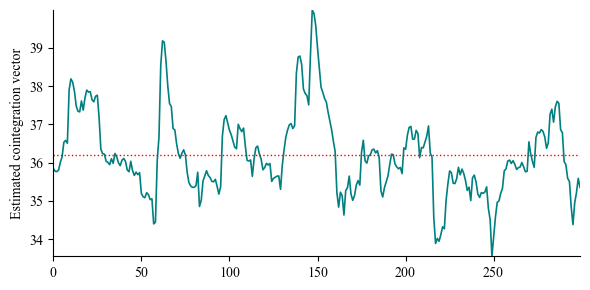

In [18]:
coint1 = -1*np.dot(cointegration_vectors,np.array(y_clean_data).T)    
fig, axs = plt.subplots(1, 1, figsize=(6, 3))
SVAR_IT.setup_axis(axs, range(len(y_clean_data)), -coint1[0], f"Estimated cointegration vector", font_props, "Teal", mean_line=True,special_data_format=[False,10])
plt.tight_layout()
plt.show()

## $\text{Q6}$
Impose your preferred rank and test hypotheses on the cointegration space using the MATLAB function jcontest. Start with tests for exclusion, stationarity and weak exogeneity. Explain the meanings of these tests.

In [19]:
print(f"For rank = {rank} and lags = {p-1}")
SVAR_TC.Stationary_Exclusion_Exogeneity(rank=float(rank), lags=p, LaTeX=False)

# Long run time

For rank = 1 and lags = 1


,,Stationarity,,Exclusion,,Weak Exogeneity
Real Money Balance,,24.188***,,11.812***,,0.002
Real GDP,,28.827***,,2.171,,13.816***
Interest Rate Spread,,21.754***,,23.483***,,14.107***


## $\text{Q7}$
Estimate the parameters in the cointegration vectors and interpret these in light of the money demand function ab ove. Do you find plausible values of the parameters in the cointegration vectors? Test null hypotheses using the MATLAB function jcontest. Explain how this test relates to the exclusion and stationarity tests.

In [20]:
cointegration_vectors, rank = SVAR_TC.Cointegration_Vectors(preferred_model=3, 
                                lags=p, p_value_threshold=0.05, 
                                normalise_on_element=[0], 
                                rank=None,LaTeX=True)

display(Math(r"\begin{equation}\beta="+SVAR_IT.To_Matrix(cointegration_vectors)+r"'\end{equation}"))

Model: 3  |  Model: H1 ("ci") [constant in coint vec and linear trend in levels] 

  Rank determined automatically using the Pantula principle
     Rank: 0 LR: 41.712 p-value: 0.0018 ( *** ) and λ = 0.103
     Rank: 1 LR: 9.321 p-value: 0.3838 (  ) and λ = 0.029

 \begin{pmatrix}  1.00000 & -0.21516 & 8.53607 \end{pmatrix} 


<IPython.core.display.Math object>

## $\text{Q8}$
Split the sample into two equal sized sub-samples and perform tests for exclusion, stationarity and weak exogeneity. Comment on the importance of the sample length for these tests

In [21]:
y_clean_data_1 = y_clean_data.iloc[:len(y_clean_data)//2].copy().reset_index(drop=True)
y_clean_data_2 = y_clean_data.iloc[len(y_clean_data)//2:].copy().reset_index(drop=True)

for data in [y_clean_data_1, y_clean_data_2]:
    from Structural_Vector_Autoregressive_Analysis import Testing_Cointegration as SVAR_TC_TEMP
    SVAR_TC_TEMP = SVAR_TC_TEMP(Base_initialize, y_dataframe=data)
    
    _, _ = SVAR_TC_TEMP.Cointegration_Vectors(preferred_model=3, 
                                lags=p, p_value_threshold=0.05, 
                                normalise_on_element=None, 
                                rank=None,LaTeX=False)
    print(f"\nFor rank = {rank} and lags = {p-1}")
    
    display(SVAR_TC_TEMP.Stationary_Exclusion_Exogeneity(rank=float(rank), lags=p, LaTeX=False))
    
    LRtest, pval, _, Arest, Brest, _, _, _, _ = \
    SVAR_TC_TEMP.johcontest(r=rank, test=['bcon'], cons=SVAR_TC_TEMP.zero_array(K+1)[K], model='H*', lags=float(p-1), alpha=0.05)

    decision = "cannot reject" if pval > threshold else "reject"
    conclusion = "include a constant but not\na trend" if pval > threshold else "include both a constant\nand a trend"

    print(f"The LR test statistic is {LRtest:.4f} with a p-value of {pval:.4f}.\n"
        f"We {decision} the null that the trend in the cointegration \n"
        f"vector is zero, suggesting we should {conclusion}.")

    print("\n   The freely estimated cointegration vector:")

    display(Math(r"\begin{equation}\beta="+SVAR_IT.To_Matrix(Brest.T)+r"'\end{equation}"))

Model: 3  |  Model: H1 ("ci") [constant in coint vec and linear trend in levels] 

  Rank determined automatically using the Pantula principle
     Rank: 0 LR: 36.446 p-value: 0.0078 ( *** ) and λ = 0.1211
     Rank: 1 LR: 17.334 p-value: 0.0262 ( ** ) and λ = 0.1105
     Rank: 2 LR: 0.001 p-value: 0.9701 (  ) and λ = 0.0

For rank = 1 and lags = 1


,,Stationarity,,Exclusion,,Weak Exogeneity
Real Money Balance,,16.933***,,0.18,,0.843
Real GDP,,18.13***,,0.997,,0.284
Interest Rate Spread,,15.829***,,0.714,,1.728


The LR test statistic is 0.7517 with a p-value of 0.3859.
We cannot reject the null that the trend in the cointegration 
vector is zero, suggesting we should include a constant but not
a trend.

   The freely estimated cointegration vector:


<IPython.core.display.Math object>

Model: 3  |  Model: H1 ("ci") [constant in coint vec and linear trend in levels] 

  Rank determined automatically using the Pantula principle

The Johansen test indicates no cointegrating relationships (rank = 0)
at the 5.00% significance level.

For rank = 1 and lags = 1


,,Stationarity,,Exclusion,,Weak Exogeneity
Real Money Balance,,16.871***,,2.604,,1.407
Real GDP,,22.298***,,3.793*,,11.293***
Interest Rate Spread,,4.789*,,16.729***,,12.639***


The LR test statistic is 0.8890 with a p-value of 0.3457.
We cannot reject the null that the trend in the cointegration 
vector is zero, suggesting we should include a constant but not
a trend.

   The freely estimated cointegration vector:


<IPython.core.display.Math object>

## $\text{Q9}$
Impose $r=1$ and and re-estimate the VEC model using the full sample and using your preferred lag length found above. Comment on the driving forces of the data in this model

In [22]:
Beta_theory = np.array([[cointegration_vectors[0][1],cointegration_vectors[0][0],  cointegration_vectors[0][2]]])
LRtest, pval, _, _, Brest, _, _, _, _ = \
    SVAR_TC.johcontest(r=rank, test=['bvec'], cons=Beta_theory.T, model='H1', lags=float(p-1), alpha=0.05)

threshold = 0.05

decision = "cannot reject" if pval > threshold else "reject"
conclusion = "do" if pval > threshold else "do not"
plural = "relationships" if int(rank) > 1 else "relationship"

print(f"The LR test statistic is {LRtest:.4f} with a p-value of {pval:.4f}. This\n"
      f"suggests that we {decision} the null that the cointegration\n"
      f"{plural} {conclusion} exist in the cointegration space")

print("\n   The cointegration vector:")

display(Math(r"\begin{equation}\beta="+SVAR_IT.To_Matrix(Brest.T)+r"'\end{equation}"))

The LR test statistic is 27.0986 with a p-value of 0.0000. This
suggests that we reject the null that the cointegration
relationship do not exist in the cointegration space

   The cointegration vector:


<IPython.core.display.Math object>

In [23]:
for i, val in enumerate(list_of_info):
    print(f"{i}: {val}" + (f" ({list_of_info_latex[i-1]})" if i > 0 else ""))

0: Dates: 1979-2003 (Monthly)
1: Real Money Balance ($\ln(M_t/P_t)$)
2: Real GDP ($\ln(Y_t)$)
3: Interest Rate Spread ($R$)


In [24]:
horizon = 100
from Structural_Vector_Autoregressive_Analysis import Identification_Restrictions_Cointegrated_SVAR as SVAR_IRC
SVAR_IRC = SVAR_IRC(Base_initialize,y_dataframe=y_clean_data, horizon = horizon, lags=p, Constant=Constant, Trend=Trend, Exogenous=None)
rank = 1

linear_combinations = None # {"Real Interest": [f"{list_of_info[2]} - {list_of_info[3]}"],
#                        "Monetary Base": [f"{list_of_info[4]} - {list_of_info[3]}"]
#                        }

print("\nLinear Combinations")
if not linear_combinations:
    linear_combinations = None
    print("  None")
else:
    for name, expressions in linear_combinations.items():
        for expr in expressions:
            print(f"  {name} = {expr}")

The estimated VAR model may be unstable due to largest absolute eigenvalue is greater than or equal to 1. 
Review the model specification for potential adjustments.
Max Eigenvalue = 1.001


Linear Combinations
  None


In [25]:
beta = SVAR_TC.Initilize_beta_vecm(lags=p,model=3, beta_theory=Beta_theory.T, rank=int(rank)).T
Beta, Betavec, SEBeta, tratioBeta, res, so, so_ml = SVAR_TC.LSKnownBeta(lags=p, beta=beta, model= 3)
Beta = Beta.T
tratioBeta = tratioBeta.T

GAMMA = Beta[:,0:K*(p-1)]       # first diff lags
alpha = Aest = Beta[:,K*(p-1):len(Beta.T)-1]   # speed of adjustment

tratioBeta_re = tratioBeta.reshape(-1, Beta.shape[1])
alpha_tratio = tratioBeta_re[:,K*(p-1):len(tratioBeta_re.T)-1]

print("Least Squares:")
print("Alpha estimates:\n",alpha.T,"\n")
print("Alpha t-ratios: \n",alpha_tratio.T)

alpha, Gamma, SigmaML, u = SVAR_IRC.VECMknown(beta=Beta_theory.T)

print("\nMaximum Likelihood ")
print("Alpha estimates: \n",alpha.T)

print("\nEquivalent: ~",np.allclose((alpha - Beta[:,K*(p-1):len(Beta.T)-1]),0))

Least Squares:
Alpha estimates:
 [[0.0034 0.0003 -0.0012]] 

Alpha t-ratios: 
 [[1.4963 0.7246 -1.7895]]

Maximum Likelihood 
Alpha estimates: 
 [[0.0034 0.0003 -0.0012]]

Equivalent: ~ True


## $\text{Q10}$

Suggest identification schemes including names of the three structural sho cks in the VAR/VEC system using first a Cholesky decomp osition and second long-run identification. If you cannot provide names for these sho cks, try to explain how they affect the data under the maintained assumptions

In [26]:
SVAR_TC.Identication_Scheme(rank)

Since the rank r = 1, there are 1 transitory/temporary shocks.
Thus, there are K-r = 2 permanent shocks.

    To identify the permanent shocks, we need (K-r)(K-r-1)/2 = 1 restrictions. (Upsilon)
    To identify the transitory shocks, we need r(r-1)/2 = 0 restrictions. (B^{-1}_0)


In [27]:
B_R = """[ * * * 
           * * * 
           * * * ]"""

U_R = """[ * * 0 
           0 * 0 
           * * 0 ]"""

## $\text{Q11}$

Write down the reduced form and structural form Common Trends model consistent with the VEC model. Show how these two representations are related

## $\text{Q12}$
What is the consequence for the long-run multiplier if we assume that the long-run money demand function is a cointegration vector?

## $\text{Q13}$
Outline how the MATLAB solver can be used to imp ose long-run restrictions

```py
Xi, SIGMA, _ = SVAR_IRC.Implement_identication(model = 3, rank=rank, beta = Beta_theory.T,ML=True)

invB0 = least_squares(lambda B0inv_flat: SVAR_IRC.Restrictions(B0inv_flat, B0inv_R=B_R, Upsilon_R=U_R, Xi=Xi, SIGMA=SIGMA,Beta=Beta_theory),
                        np.random.randn(K * K))#, xtol=1e-1000000, gtol=1e-1000000, max_nfev=30000)

B0inv = invB0.x.reshape((K, K))
B0inv[:, B0inv.diagonal() < 0] *= -1

print("B_0^{-1}(B_0^{-1})'-\Sigma = 0        ",np.allclose((B0inv @ B0inv.T - SIGMA), 0))
print("\\beta'\\Upsilon = 0                    ",np.allclose((Beta_theory @ Xi @ B0inv), 0))
print("(B_0^{-1} \Sigma @ B_0^{-1})' = I_K   ",np.allclose((np.linalg.inv(B0inv) @ SIGMA @ np.linalg.inv(B0inv).T), np.eye(K)))
Upsilon_solve = Xi @ B0inv
B0inv_solve = B0inv

print("\nB^{-1}_0 =\n",SVAR_IT.To_Matrix(B0inv,short=False))
print("\n\\Upsilon =\n",SVAR_IT.To_Matrix(Xi @ B0inv,short=False))
```

## $\text{Q14}$
Estimate a VAR model (using your preferred number of lags found previously) with all variables in log-levels and use this model together with a Cholesky decomp osition to compute impulse response functions. Discuss and explain how you order the time series vector, i.e., explain and motivate the identifying restrictions you use. Show the impulse responses in a graph and interpret your results. Comment on the price puzzle. Is it still there in the model or not? If not, try to provide an explanation. No confidence bands are required

$$\Huge\textcolor{red}{\text{The content below this point may be incorrect}}$$


The estimated VAR model is stable. The largest absolute eigenvalue is: 0.9639


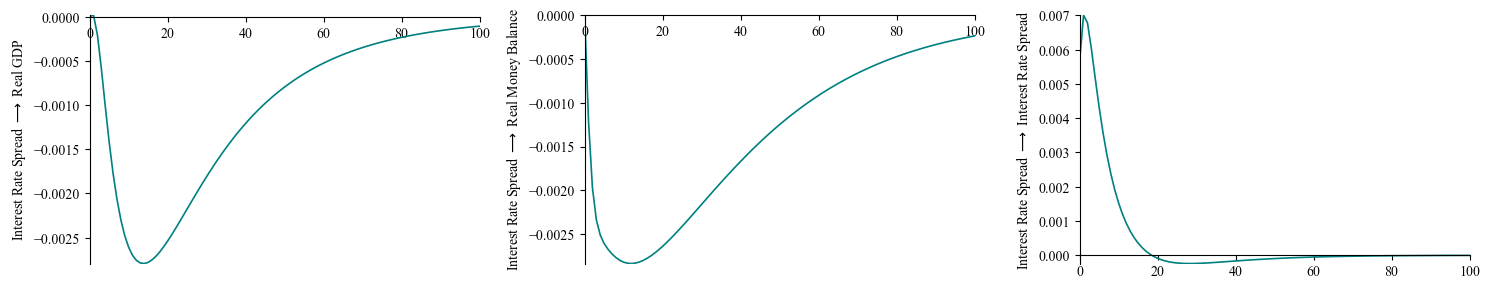

In [28]:
from Structural_Vector_Autoregressive_Analysis import Identification_Restrictions_Cointegrated_SVAR as SVAR_IRC_trend
SVAR_IRC_trend = SVAR_IRC_trend(Base_initialize,y_dataframe=y_clean_data, horizon = horizon, lags=p, Constant=Constant, Trend=True, Exogenous=None)

irf_trend = SVAR_IRC_trend.IRF(B0inv=None,VEC=False,VAR=True)
IRF_result = SVAR_IRC_trend.IRF_estimation(IRF_var=irf_trend, list_of_info=list_of_info, normalise=None)#list_of_info[3]) # None)

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
SVAR_IT.setup_axis(axs[0], range(horizon+1), IRF_result[list_of_info[2]][list_of_info[3]],  f"{list_of_info[3]} $\\longrightarrow$ {list_of_info[2]}", font_props, "teal", mean_line=False,special_data_format=[False,10],at_zero=True)# y_axis=[0.01,-0.01])
SVAR_IT.setup_axis(axs[1], range(horizon+1), IRF_result[list_of_info[1]][list_of_info[3]],  f"{list_of_info[3]} $\\longrightarrow$ {list_of_info[1]}", font_props, "teal", mean_line=False,special_data_format=[False,10],at_zero=True)# y_axis=[0.01,-0.01])
SVAR_IT.setup_axis(axs[2], range(horizon+1), IRF_result[list_of_info[3]][list_of_info[3]],  f"{list_of_info[3]} $\\longrightarrow$ {list_of_info[3]}", font_props, "teal", mean_line=False,special_data_format=[False,10],at_zero=True)# y_axis=[0.01,-0.01])
plt.tight_layout()
plt.show()

## $\text{Q15}$
Instead of using a standard VAR and recursive identification we can identify the model using a combination of short-run and long-run identifying restrictions. Use the MATLAB solver to identify the structural VEC model estimated previously. Check that the solver provides a valid identification and compute the variance-covariance matrix of the identified structural shocks. Please, provide the MATLAB co de you are using to identify the sho cks in the app endix. It must include a description of the null restrictions you impose

In [29]:
Xi, SIGMA, _ = SVAR_IRC.Implement_identication(model = 3, rank=rank, beta = Beta_theory.T,ML=True)

invB0 = least_squares(lambda B0inv_flat: SVAR_IRC.Restrictions(B0inv_flat, B0inv_R=B_R, Upsilon_R=U_R, Xi=Xi, SIGMA=SIGMA,Beta=Beta_theory),
                        np.random.randn(K * K))#, xtol=1e-1000000, gtol=1e-1000000, max_nfev=30000)

B0inv = invB0.x.reshape((K, K))
B0inv[:, B0inv.diagonal() < 0] *= -1

print("B_0^{-1}(B_0^{-1})'-\Sigma = 0        ",np.allclose((B0inv @ B0inv.T - SIGMA), 0))
print("\\beta'\\Upsilon = 0                    ",np.allclose((Beta_theory @ Xi @ B0inv), 0))
print("(B_0^{-1} \Sigma @ B_0^{-1})' = I_K   ",np.allclose((np.linalg.inv(B0inv) @ SIGMA @ np.linalg.inv(B0inv).T), np.eye(K)))
Upsilon_solve = Xi @ B0inv
B0inv_solve = B0inv

print("\nB^{-1}_0 =\n",SVAR_IT.To_Matrix(B0inv,short=False))
print("\n\\Upsilon =\n",SVAR_IT.To_Matrix(Xi @ B0inv,short=False))

B_0^{-1}(B_0^{-1})'-\Sigma = 0         True
\beta'\Upsilon = 0                     True
(B_0^{-1} \Sigma @ B_0^{-1})' = I_K    True

B^{-1}_0 =
 \begin{pmatrix}
0.01566 & -0.00478 & -0.01387 \\
-0.00029 & 0.00370 & -0.00122 \\
0.00289 & 0.00259 & 0.00473 \\
\end{pmatrix}

\Upsilon =
 \begin{pmatrix}
0.02585 & 0.01097 & -0.00000 \\
-0.00000 & 0.00836 & 0.00000 \\
0.00065 & -0.00070 & 0.00000 \\
\end{pmatrix}


## $\text{Q16}$

Estimate the structural VAR model and compute impulse resp onse functions (with bootstrap confidence bands using the delta method, i.e., the standard residual based recursive design bootstrap with intervals based on bootstrap standard errors) and variance decompositions (with bootstrap standard errors using Efron's percentile intervals). You can show forecast error variance decompositions in either a table or in a graph. Interpret your results

In [30]:
IRFmat, VCmat = SVAR_IRC_trend.VAR_Bootstrap(n_trials=500, Bootstrap = True, Bootstrap_type = "De lta", 
                                       Orthogonal = True , B0inv_R=B_R, Upsilon_R=U_R, 
                                       initial_guess=B0inv)

irf_trend = SVAR_IRC_trend.IRF(B0inv=B0inv,VEC=False,VAR=True)

Trial: 500 of 1278  |  Failures due to solver: 0 | Failures due to unstable eigenvalue: 778
Bootstrap based on: 500 trials
Bootstrap type in use: non parametric
Unstable replications: 778


Impulse Response Function
Bootstrap (Wild) Confidence Intervals (Delta)


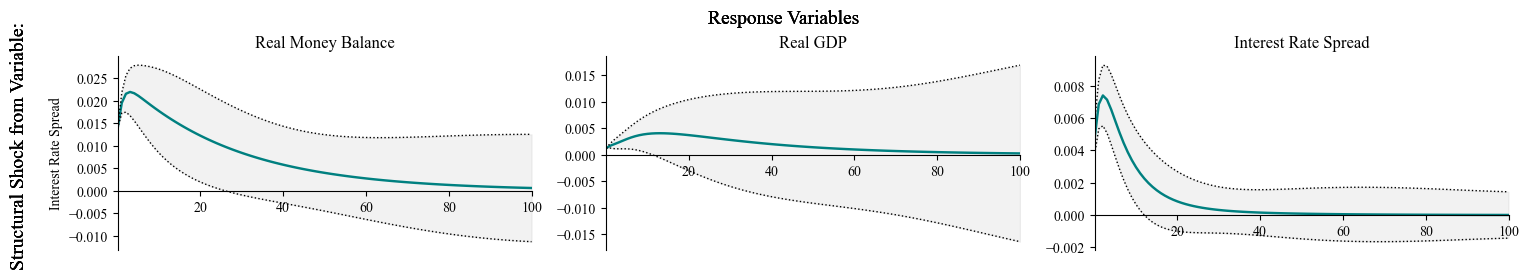

In [31]:
SVAR_IRC.IRF_Combined_Plots(
    linear_combinations = None, # None or linear_combinations
    Bootstrap_Matrix = IRFmat,
    confidence_type = "Delta",  # or "Efron" can be extended.
    responses = [1,2,3],      # None = All = [1,2,...,K] and can be any combination e.g [3,1]
    shocks = [3],         # None = All = [1,2,...,K] and can be any combination e.g [2]
    z_values = [95],            # mulitple e.g. z_values=[95,68]
    Baseline = abs(irf_trend),             
    Info="Wild",                # VEC_Bootstrap() setting
    )

## $\text{Q17}$

Show a plot of the accumulated permanent shock(s) and the three variables. Discuss the results. Is it possible to draw conclusions regarding the driving forces of the variables?


In [32]:
horizon = 100
from Structural_Vector_Autoregressive_Analysis import Identification_Restrictions_Cointegrated_SVAR as SVAR_IRC
SVAR_IRC = SVAR_IRC(Base_initialize, y_dataframe=y_clean_data, horizon=horizon,
                     lags=2, Constant=True, Trend=False)

The estimated VAR model may be unstable due to largest absolute eigenvalue is greater than or equal to 1. 
Review the model specification for potential adjustments.
Max Eigenvalue = 1.001



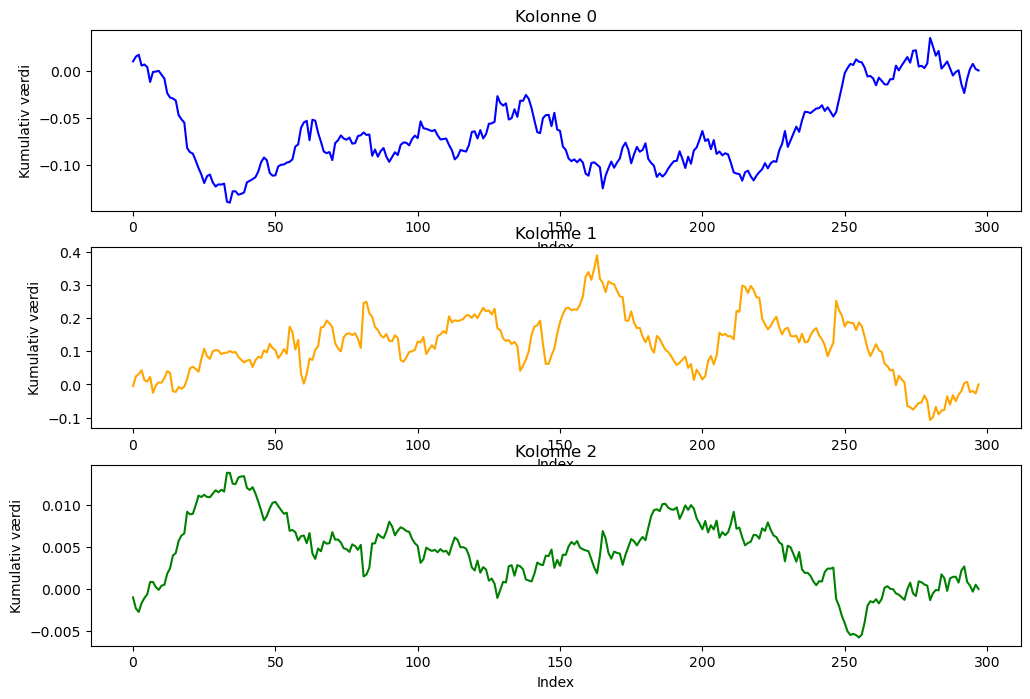

In [33]:
cumulative_sum_1 = -(Xi @ u)[0].cumsum()
cumulative_sum_0 = (Xi  @ u)[1].cumsum()
cumulative_sum_2 = (Xi  @ u)[2].cumsum()

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(cumulative_sum_0, color="blue")
plt.title("Kolonne 0")
plt.xlabel("Index")
plt.ylabel("Kumulativ værdi")
plt.grid(False)
plt.subplot(3, 1, 2)
plt.plot(cumulative_sum_1, color="orange")
plt.title("Kolonne 1")
plt.xlabel("Index")
plt.ylabel("Kumulativ værdi")
plt.grid(False)
plt.subplot(3, 1, 3)
plt.plot(cumulative_sum_2, color="green")
plt.title("Kolonne 2")
plt.xlabel("Index")
plt.ylabel("Kumulativ værdi")
plt.grid(False)

## $\text{Q18}$
An alternative to using the MATLAB solver to compute the $B^{-1}_0$ matrix is to use the approach suggested by Warne (1993). Outline this approach and show how the Warne approach can b e used to identify the structural sho cks in your preferred VEC model. Discuss b oth the identification of permanent and transitory shocks


In [34]:
Beta_theory = np.array([[cointegration_vectors[0][1],cointegration_vectors[0][0],  cointegration_vectors[0][2]]])
Xi, SIGMA, _ = SVAR_IRC.Implement_identication(model = 3, rank=1.0, beta = Beta_theory.T, ML=True)

In [35]:
from sympy import symbols
rank = 1.0
# Definer symboler og matrixer
Beta_theory_latex = Matrix([[symbols(r'\beta_1'),symbols(r'\beta_2'),symbols(r'\beta_3')]])
Upsilon0_latex = Matrix([[symbols(f"\\Upsilon_{{{i+1}{j+1}}}^0") for j in range(int(K))] for i in range(int(K-rank))])
result = Beta_theory_latex * Upsilon0_latex.T
def matrix_to_latex(matrix):
    return r"\begin{pmatrix}" + r"\\ ".join([" & ".join(map(str, row)) for row in matrix.tolist()]) + r"\end{pmatrix}"
latex_expr = (fr"\begin{{equation}} \underset{{({Beta_theory_latex.shape[0]},{int(rank)})}}{{\underset{{{Beta_theory_latex.shape}}}{{\beta'}} \underset{{({int(K)}, {int(rank)})}}{{\Upsilon_0}}}} = " + matrix_to_latex(Beta_theory_latex) + matrix_to_latex(Upsilon0_latex.T) + "=" + matrix_to_latex(result) +r"\end{equation}").replace("*", "\\cdot")
display(Math(latex_expr))

<IPython.core.display.Math object>

In [36]:
Upsilon0 = np.array([[-1, 0, Beta_theory[0][0]/Beta_theory[0][2]],
                     [0, 1, -1/Beta_theory[0][2]]]).T
Beta_theory @ Upsilon0

array([[0.0000, 0.0000]])

## $\text{Q19}$
Co de this identification and compute the implied $B{-1}_0$ matrix and show that it is identical to the one found by the solver. Please, provide the co de you are using in the appendix

In [37]:
pipit = np.dot(np.dot(np.dot(np.dot(np.linalg.inv(np.dot(Upsilon0.T,Upsilon0)),Upsilon0.T),Xi),SIGMA),np.dot(np.dot(np.linalg.inv(np.dot(Upsilon0.T,Upsilon0)),Upsilon0.T),Xi).T)            
pimat = np.linalg.cholesky(pipit)

Upsilon = np.dot(Upsilon0,pimat)                       
Fk = np.dot(np.dot(np.linalg.inv(np.dot(Upsilon.T,Upsilon)),Upsilon.T),Xi)
print('Fk matrix\n',Fk)

Umat = None

if Umat is None:
   Umat = np.zeros((int(rank), K))  # Antager en nulmatrix af størrelse r x K
   for i in range(1, int(rank) + 1):
      Umat[i - 1, K - i] = 1  # Python-indeks starter fra 0

if np.linalg.det(np.dot(Umat,Aest)) == 0:
   print('\n Identification of transitory shock is invalid')
else:
   print('\n Identification of transitory shocks is valid')

xi = np.dot(Aest,np.linalg.inv(np.dot(Umat,Aest)))  

i=0
while i < K:
   j=0
   while j< int(rank):
      if abs(xi[i,j]) < 1E-8: #just to make sure that elements are = 0
         xi[i,j] = 0
      j=j+1
   i=i+1

qr=np.linalg.cholesky(np.dot(np.dot(xi.T,np.linalg.inv(SIGMA)),xi))                   
Fr=np.dot(np.dot(np.linalg.inv(qr),xi.T),np.linalg.inv(SIGMA))
print('\n Fr matrix\n',Fr)

# Putting it all together to compute B0inv
invB0 = np.linalg.inv(np.vstack((Fk,Fr)))
invB0[:, invB0.diagonal() < 0] *= -1


print("\nB_0^{-1}\n",invB0)
print("")
print('\n(1) beta*Xi should be zero\n',np.dot(Beta_theory,Xi))
print('\n(2) beta*Upsilon_0 should be zero\n',np.dot(Beta_theory,Upsilon0))
print('\n(3) C(1)*B0^{-1} should be Upsilon~zeros(K,r)\n',np.dot(-Xi,invB0))
print('\nwhere Upsilon\n',Upsilon)
print('\n(4) Covariance matrix of structural shocks w_t should be I_K\n',np.dot(np.dot(np.linalg.inv(invB0),SIGMA),np.linalg.inv(invB0).T))
print('\nShould be diagonal\n',np.dot(np.dot(np.dot(np.dot(np.linalg.inv(qr),xi.T),np.linalg.inv(SIGMA)),xi),np.linalg.inv(qr.T))    )
print('\nThis compares Upsilon solver and closed form solution\n',Upsilon[:,0:K-int(rank)+1],'\n',Upsilon_solve[:,0:K-int(rank)+1],"\n")

Upsilon_Warne = np.dot(Xi,invB0)
B0inv_Warne = invB0

Fk matrix
 [[-36.9020 -65.5832 -125.0634]
 [-20.4518 223.9169 -2.0851]]

 Identification of transitory shocks is valid

 Fr matrix
 [[-23.2082 -110.4389 114.7198]]

B_0^{-1}
 [[0.0125 -0.0105 -0.0139]
 [0.0012 0.0035 -0.0012]
 [0.0037 0.0013 0.0047]]


(1) beta*Xi should be zero
 [[-0.0000 -0.0000 -0.0000]]

(2) beta*Upsilon_0 should be zero
 [[0.0000 0.0000]]

(3) C(1)*B0^{-1} should be Upsilon~zeros(K,r)
 [[-0.0281 -0.0000 -0.0000]
 [-0.0033 -0.0077 0.0000]
 [-0.0003 0.0009 -0.0000]]

where Upsilon
 [[-0.0281 0.0000]
 [-0.0033 0.0077]
 [-0.0003 -0.0009]]

(4) Covariance matrix of structural shocks w_t should be I_K
 [[1.0000 -0.0000 0.0000]
 [-0.0000 1.0000 0.0000]
 [-0.0000 0.0000 1.0000]]

Should be diagonal
 [[1.0000]]

This compares Upsilon solver and closed form solution
 [[-0.0281 0.0000]
 [-0.0033 0.0077]
 [-0.0003 -0.0009]] 
 [[0.0259 0.0110 -0.0000]
 [-0.0000 0.0084 0.0000]
 [0.0007 -0.0007 0.0000]] 



$$B^{-1}_0=
\begin{bmatrix}
0.0028 & 0.0002 & 0.0026 \\
-0.0034 & 0.0213 & -0.0002 \\
-0.0034 & -0.0021 & 0.0044 \\
\end{bmatrix}
$$
$$
\Upsilon=
\begin{bmatrix}
0.0085 & 0.0022 & -0.0000 \\
0.0000 & 0.0336 & -0.0000 \\
0.0002 & -0.0039 & 0.0000 \\
\end{bmatrix}$$

In [38]:
print("Upsilon  ≈  Upsilon (solve)   ~  ",np.allclose(Upsilon_Warne, Upsilon_solve))
print("B_0^{-1} ≈  B_0^{-1} (solve)  ~  ",np.allclose(B0inv_Warne, B0inv_solve))

print("\nDifference (Maximum)")
print(f"    B_0^{{-1}}:  {np.max(B0inv_Warne - B0inv_solve):.25f}")
print(f"    Upsilon:   {np.max(Upsilon_Warne - Upsilon_solve):.25f}")

def matrix(matrix, name):
    string = f"$$\n{name} = \\begin{{pmatrix}}\n"
    rows, cols = matrix.shape
    for i in range(rows):
        row = " & ".join([f"{matrix[i, j]:.10f}" for j in range(cols)])
        string += row + " \\\\\n"
    string += "\\end{pmatrix}\n$$"
    return string

display(Math(matrix(B0inv_solve, "\\underset{(\\textit{Solver})}{B_{0}^{-1}}")))
display(Math(matrix(B0inv_Warne, "\\underset{(\\textit{Warne})}{B_{0}^{-1}}")))
print("")
display(Math(matrix(Upsilon_solve, "\\underset{(\\textit{Solver})}{\\Upsilon_{0}}")))
display(Math(matrix(Upsilon_Warne, "\\underset{(\\textit{Warne})}{\\Upsilon_{0}}")))

Upsilon  ≈  Upsilon (solve)   ~   False
B_0^{-1} ≈  B_0^{-1} (solve)  ~   False

Difference (Maximum)
    B_0^{-1}:  0.0014674301034822358376364
    Upsilon:   0.0032658061311114264073374


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>